Word2Vec model to generate Vectors/ids for the words

In [106]:
# Genism
from gensim.models import Word2Vec
from smart_open import open
import os

# Tensor
import tensorflow as tf
from tensorflow import keras

#plotting
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# NLTK
import numpy as np 
import re
import string 
import nltk
from nltk.corpus import stopwords , brown

In [61]:
# File open & Read

with open('Para.txt', 'r') as file:
    para = file.read().replace('\n', '')
# file.seek(0,0)
para

'25763772|t|DCTN4 as a modifier of chronic Pseudomonas aeruginosa infection in cystic fibrosis25763772|a|Pseudomonas aeruginosa (Pa) infection in cystic fibrosis (CF) patients is associated with worse long-term pulmonary disease and shorter survival, and chronic Pa infection (CPA) is associated with reduced lung function, faster rate of lung decline, increased rates of exacerbations and shorter survival. By using exome sequencing and extreme phenotype design, it was recently shown that isoforms of dynactin 4 (DCTN4) may influence Pa infection in CF, leading to worse respiratory disease. The purpose of this study was to investigate the role of DCTN4 missense variants on Pa infection incidence, age at first Pa infection and chronic Pa infection incidence in a cohort of adult CF patients from a single centre. Polymerase chain reaction and direct sequencing were used to screen DNA samples for DCTN4 variants. A total of 121 adult CF patients from the Cochin Hospital CF centre have been incl

In [62]:
# scentences to tokens
# used for para to tokens
def preprocessing(corpus): 
    stop_words = set(stopwords.words('english'))     
    training_data = [] 
    sentences = corpus.split(".") 
    for i in range(len(sentences)): 
        sentences[i] = sentences[i].strip() 
        sentence = sentences[i].split() 
        x = [word.strip(string.punctuation) for word in sentence 
                                     if word not in stop_words] 
        x = [word.lower() for word in x] 
        training_data.append(x) 
    return training_data 

# function call
para = preprocessing(para)
para

[['25763772|t|dctn4',
  'modifier',
  'chronic',
  'pseudomonas',
  'aeruginosa',
  'infection',
  'cystic',
  'fibrosis25763772|a|pseudomonas',
  'aeruginosa',
  'pa',
  'infection',
  'cystic',
  'fibrosis',
  'cf',
  'patients',
  'associated',
  'worse',
  'long-term',
  'pulmonary',
  'disease',
  'shorter',
  'survival',
  'chronic',
  'pa',
  'infection',
  'cpa',
  'associated',
  'reduced',
  'lung',
  'function',
  'faster',
  'rate',
  'lung',
  'decline',
  'increased',
  'rates',
  'exacerbations',
  'shorter',
  'survival'],
 ['by',
  'using',
  'exome',
  'sequencing',
  'extreme',
  'phenotype',
  'design',
  'recently',
  'shown',
  'isoforms',
  'dynactin',
  '4',
  'dctn4',
  'may',
  'influence',
  'pa',
  'infection',
  'cf',
  'leading',
  'worse',
  'respiratory',
  'disease'],
 ['the',
  'purpose',
  'study',
  'investigate',
  'role',
  'dctn4',
  'missense',
  'variants',
  'pa',
  'infection',
  'incidence',
  'age',
  'first',
  'pa',
  'infection',
  'chron

In [159]:
DIM = 300

# Word to Vec model || genism
def model(itera):
    model = Word2Vec(para, min_count=1, size=DIM, sg = 1 , iter=itera)
    return model
w2v = model(100)

In [75]:
# existing vocabalary

vocab = list(w2v.wv.vocab)
print(vocab)

['25763772|t|dctn4', 'modifier', 'chronic', 'pseudomonas', 'aeruginosa', 'infection', 'cystic', 'fibrosis25763772|a|pseudomonas', 'pa', 'fibrosis', 'cf', 'patients', 'associated', 'worse', 'long-term', 'pulmonary', 'disease', 'shorter', 'survival', 'cpa', 'reduced', 'lung', 'function', 'faster', 'rate', 'decline', 'increased', 'rates', 'exacerbations', 'by', 'using', 'exome', 'sequencing', 'extreme', 'phenotype', 'design', 'recently', 'shown', 'isoforms', 'dynactin', '4', 'dctn4', 'may', 'influence', 'leading', 'respiratory', 'the', 'purpose', 'study', 'investigate', 'role', 'missense', 'variants', 'incidence', 'age', 'first', 'cohort', 'adult', 'single', 'centre', 'polymerase', 'chain', 'reaction', 'direct', 'used', 'screen', 'dna', 'samples', 'a', 'total', '121', 'cochin', 'hospital', 'included', 'carrying', 'two', 'cftr', 'defects', '103', 'developed', 'least', '1', '68', 'identified', '24', '29/121', '17', '3/18', 'of', '29', '20/68', 'vs', '23', '8/35', 'without', 'interestingly',

In [76]:
# Saving model
w2v.save("w2v.model")

In [77]:
# testing
# similar by word
w2v.most_similar("dynactin")[:10]

/home/grrao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('4', 0.9998409748077393),
 ('shown', 0.9998331069946289),
 ('phenotype', 0.9998272061347961),
 ('recently', 0.9998263120651245),
 ('isoforms', 0.999824583530426),
 ('extreme', 0.9998189210891724),
 ('design', 0.9998171329498291),
 ('influence', 0.9998127818107605),
 ('may', 0.999800980091095),
 ('leading', 0.9997978210449219)]

Generating training file for tags

In [78]:
#opening file (tag file)
with open('data.txt', 'r') as file:
    tag = file.read()
# file.seek(0,0)
str = tag.split("\n")
str

['63772\t0\t5\tDCTN4\tT116,T123\tC4308010',
 '25763772\t23\t63\tchronic Pseudomonas aeruginosa infection\tT047\tC0854135',
 '25763772\t67\t82\tcystic fibrosis\tT047\tC0010674',
 '25763772\t83\t120\tPseudomonas aeruginosa (Pa) infection\tT047\tC0854135',
 '25763772\t124\t139\tcystic fibrosis\tT047\tC0010674',
 '25763772\t141\t143\tCF\tT047\tC0010674',
 '25763772\t145\t153\tpatients\tT101\tC0030705',
 '25763772\t179\t188\tlong-term\tT079\tC0443252',
 '25763772\t189\t206\tpulmonary disease\tT047\tC0024115',
 '25763772\t211\t227\tshorter survival\tT169\tC0220921',
 '25763772\t233\t253\tchronic Pa infection\tT047\tC0854135',
 '25763772\t255\t258\tCPA\tT047\tC0854135',
 '25763772\t279\t300\treduced lung function\tT033\tC0847557',
 '25763772\t302\t329\tfaster rate of lung decline\tT033\tC3160731',
 '25763772\t341\t346\trates\tT081\tC1521828',
 '25763772\t350\t363\texacerbations\tT033\tC4086268',
 '25763772\t368\t384\tshorter survival\tT169\tC0220921',
 '25763772\t395\t411\texome sequencing\tT

In [128]:
#processing data -2
import re
def preprocessing1(corpus):
    training_data = []
    for i in str:
        i = i.split()
        i.pop(0)
        i.pop(0)
        i.pop(0)
        i.pop(-1)
        i = [word.lower() for word in i]
        for el in range(len(i)-1):
            l2 = [i[el],i[len(i)-1]]
            training_data.append(tuple(l2)) 
    return training_data
tag = preprocessing1(str)

#dictionary format of dicts
tag_dict = {il[0]:il[1] for il in tag}
tag_dict

{'dctn4': 't116,t123',
 'chronic': 't047',
 'pseudomonas': 't047',
 'aeruginosa': 't047',
 'infection': 't047',
 'cystic': 't047',
 'fibrosis': 't047',
 '(pa)': 't047',
 'cf': 't047',
 'patients': 't101',
 'long-term': 't079',
 'pulmonary': 't047',
 'disease': 't047',
 'shorter': 't169',
 'survival': 't169',
 'pa': 't047',
 'cpa': 't047',
 'reduced': 't033',
 'lung': 't033',
 'function': 't033',
 'faster': 't033',
 'rate': 't033',
 'of': 't033',
 'decline': 't033',
 'rates': 't081',
 'exacerbations': 't033',
 'exome': 't063',
 'sequencing': 't063',
 'extreme': 't052',
 'phenotype': 't052',
 'design': 't052',
 'isoforms': 't116',
 'dynactin': 't116,t123',
 '4': 't116,t123',
 'respiratory': 't047',
 'study': 't062',
 'investigate': 't169',
 'missense': 't033',
 'variants': 't116',
 'incidence': 't081',
 'age': 't032',
 'cohort': 't098',
 'adult': 't100',
 'centre': 't073,t093',
 'polymerase': 't063',
 'chain': 't063',
 'reaction': 't063',
 'direct': 't063',
 'dna': 't026',
 'samples': 't

/home/grrao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


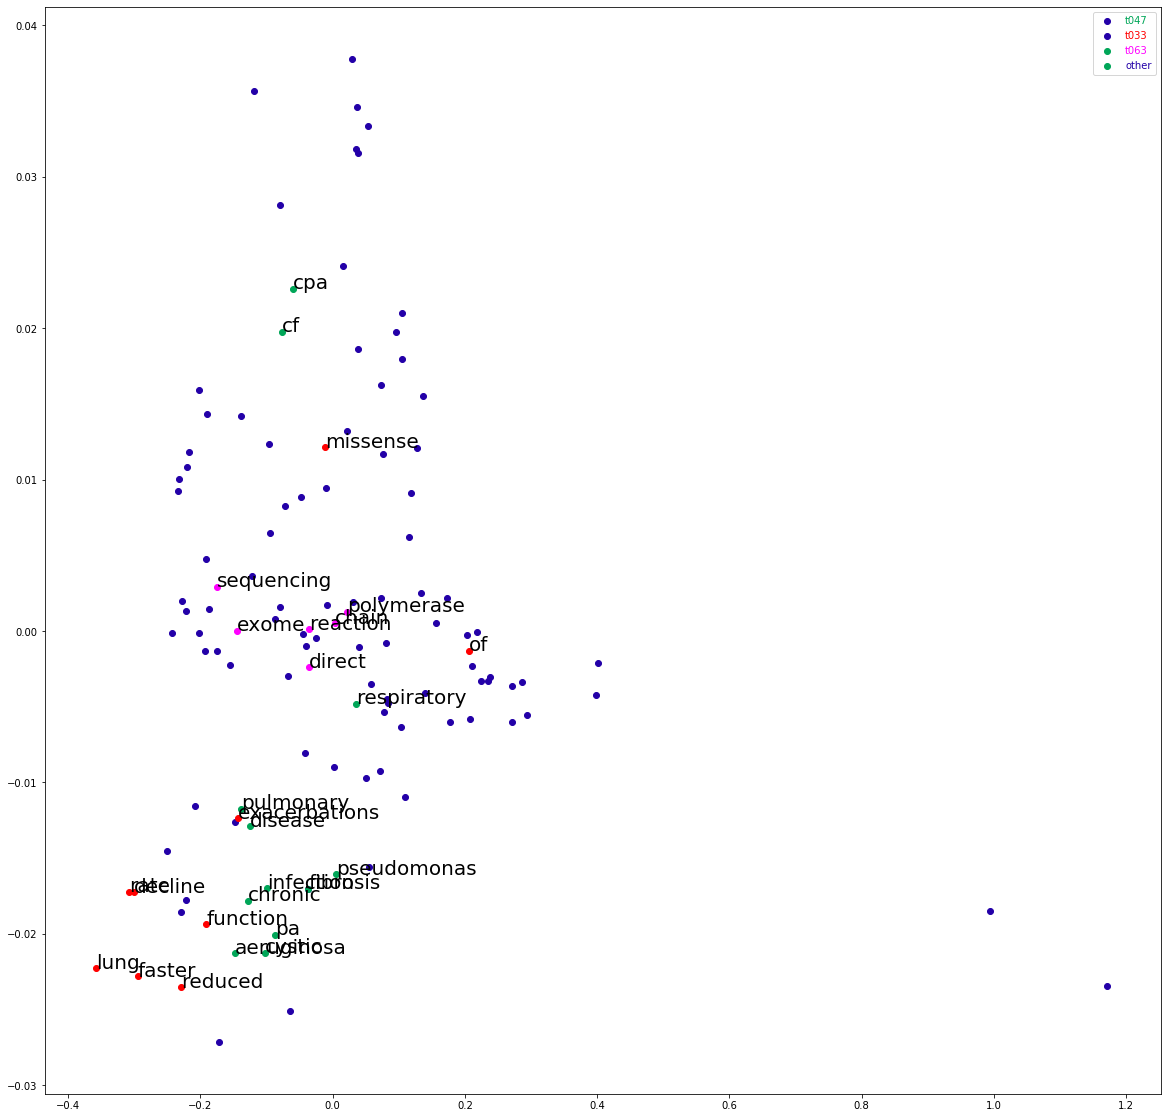

In [138]:
targets = ['t047','t033','t063','other']
colors = ['#00A658','#FF0000','#FF00FF','#2300A8']
colours = ['g','r','b']

# To get the color to be displayed
def get_color(word):
    value = tag_dict.get(word, "o")
    for i in range(len(targets)):
        if value == targets[i]:
            break;
    return i

# PCA plotting for model
X = w2v[w2v.wv.vocab]
pca = PCA()
result = pca.fit_transform(X)

# create a scatter plot of the projection
f,ax = plt.subplots(figsize = (20,20))

words = list(w2v.wv.vocab)
for i, word in enumerate(words):
    j = get_color(word)
    ax.scatter(result[i, 0], result[i, 1],color=colors[j])
    if j<(len(targets)-1):
        ax.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize = 20)

leg = ax.legend(targets)

for color,text in zip(colors,leg.get_texts()):
    text.set_color(color)
plt.show()

^^^^Make this change ^^^^
['dynactin 4', 't116,t123']   =====>>>>> [['dynactin 4', 't116'],['dynactin 4', 't123']]

POS (Part of Speech model)

In [70]:
def get_tag_vocab(tagged_words):
    tag2id={}
    for item in tagged_words:
        tag = item[1]
        tag2id.setdefault(tag, len(tag2id))
    return tag2id
word2id = {k: v.index for k, v in w2v.wv.vocab.items()}
tag2id = get_tag_vocab(tag)

In [71]:
word2id

{'25763772|t|dctn4': 34,
 'modifier': 35,
 'chronic': 8,
 'pseudomonas': 36,
 'aeruginosa': 13,
 'infection': 2,
 'cystic': 14,
 'fibrosis25763772|a|pseudomonas': 37,
 'pa': 3,
 'fibrosis': 38,
 'cf': 1,
 'patients': 0,
 'associated': 15,
 'worse': 16,
 'long-term': 39,
 'pulmonary': 17,
 'disease': 18,
 'shorter': 19,
 'survival': 20,
 'cpa': 4,
 'reduced': 40,
 'lung': 21,
 'function': 41,
 'faster': 42,
 'rate': 43,
 'decline': 44,
 'increased': 45,
 'rates': 46,
 'exacerbations': 47,
 'by': 48,
 'using': 49,
 'exome': 50,
 'sequencing': 22,
 'extreme': 51,
 'phenotype': 52,
 'design': 53,
 'recently': 54,
 'shown': 55,
 'isoforms': 56,
 'dynactin': 57,
 '4': 58,
 'dctn4': 5,
 'may': 23,
 'influence': 59,
 'leading': 60,
 'respiratory': 61,
 'the': 62,
 'purpose': 63,
 'study': 64,
 'investigate': 65,
 'role': 66,
 'missense': 7,
 'variants': 6,
 'incidence': 24,
 'age': 67,
 'first': 68,
 'cohort': 69,
 'adult': 25,
 'single': 70,
 'centre': 26,
 'polymerase': 71,
 'chain': 72,
 'r

In [72]:
tag2id

{'t116,t123': 0,
 't047': 1,
 't101': 2,
 't079': 3,
 't169': 4,
 't033': 5,
 't081': 6,
 't063': 7,
 't052': 8,
 't116': 9,
 't062': 10,
 't032': 11,
 't098': 12,
 't100': 13,
 't073,t093': 14,
 't026': 15,
 't028': 16,
 't007': 17,
 't045': 18,
 't046': 19}

/home/grrao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


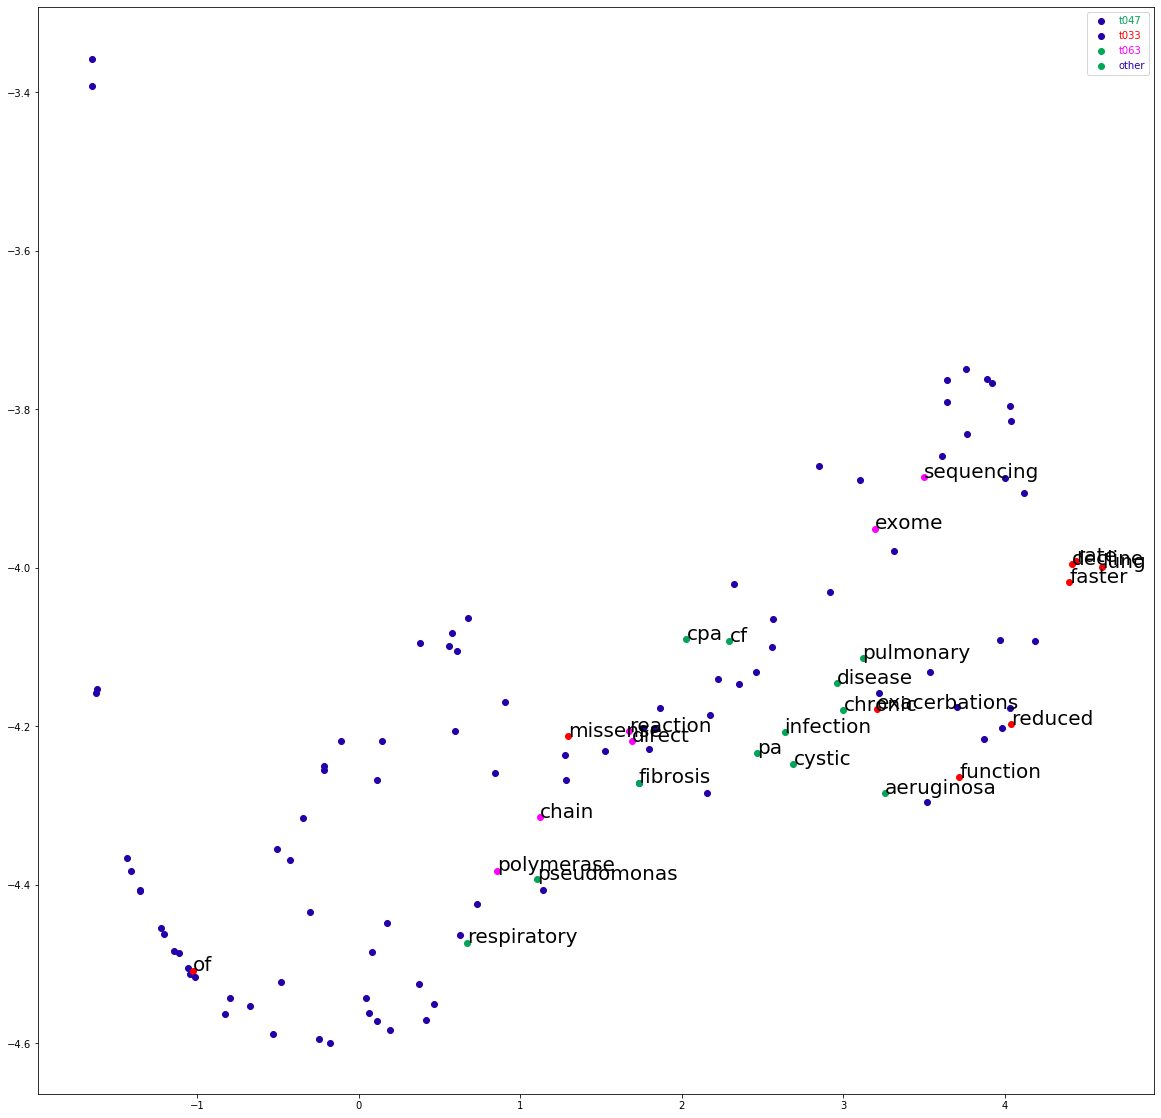

In [154]:
# To get the color to be displayed
def get_color(word):
    value = tag_dict.get(word, "o")
    for i in range(len(targets)):
        if value == targets[i]:
            break;
    return i

# PCA plotting for model
X = w2v[w2v.wv.vocab]
tsne = TSNE(perplexity=70.0,n_iter=5000)
result = tsne.fit_transform(X)

# create a scatter plot of the projection
f,ax = plt.subplots(figsize = (20,20))

words = list(w2v.wv.vocab)
for i, word in enumerate(words):
    j = get_color(word)
    ax.scatter(result[i, 0], result[i, 1],color=colors[j])
    if j<(len(targets)-1):
        ax.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize = 20)

leg = ax.legend(targets)

for color,text in zip(colors,leg.get_texts()):
    text.set_color(color)
plt.show()